In [1]:
#Importing the required library and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import time
import datetime
import requests
import io
import os

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#downloading the URL programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#Opening the file and saving the content response
with open('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)

In [5]:
response

<Response [200]>

In [6]:
#loading file using pandas
image = pd.read_csv('image-predictions.tsv', sep = '\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#importing the required libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
twitter.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [10]:
tweet_ids = twitter.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [11]:
len(tweet_ids)

2356

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            #Get the data status for each tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            #Convert each tweet status to JSON and save in the outfile file
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.error.TweepError as e:
        #except tweepy.errors.TweepyException as e:
        #except tweepy.errors.TweepyError as e:
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 430


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 340


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [13]:
# Empty list to convert to Dataframe
file = []

# Open json text file for reading
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        #Read each JSON string into a dictionary and read each line as a dictionary
        each_tweet_line = json.loads(line)
        # Fetching the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        file.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweets = pd.DataFrame(file, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [14]:
file

[{'id': 892420643555336193,
  'retweet_count': 6997,
  'favorite_count': 33784,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 892177421306343426,
  'retweet_count': 5297,
  'favorite_count': 29309,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 891815181378084864,
  'retweet_count': 3476,
  'favorite_count': 22038,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 891689557279858688,
  'retweet_count': 7219,
  'favorite_count': 36900,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 891327558926688256,
  'retweet_count': 7751,
  'favorite_count': 35286,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 891087950875897856,
  'retweet_count': 2598,
  'favorite_count': 17797,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 890971913173991426,
  'retweet_count': 1659,
  'favorite_count': 10355,
  'followers_count': 9302122,
  'friends_count': 21},
 {'id': 890729181411237888,
  'retweet_count': 15742,
  'favor

In [15]:
tweets

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6997,33784,9302122,21
1,892177421306343426,5297,29309,9302122,21
2,891815181378084864,3476,22038,9302122,21
3,891689557279858688,7219,36900,9302122,21
4,891327558926688256,7751,35286,9302122,21
...,...,...,...,...,...
2322,666049248165822465,37,89,9302167,21
2323,666044226329800704,115,247,9302167,21
2324,666033412701032449,36,100,9302167,21
2325,666029285002620928,39,112,9302167,21


## Assessing Data

##### Assessing
This is the second step in the data wrangling process and will be inspecting the data for two things: Data Quality issues(content issues) and Lack of tidiness(Data Structure).
##### Data quality Issues:  
This is the data with quality issues such as missing, duplicate or incorrect data and they are called DIRTY DATA: Data that has issues with data content.
##### Lack of tidiness:
This is the data that has specific structural issues that slows you down when cleaning and analysying, visualization or modeling your data and they are called MESSY DATA: Data that has issues with its structure (columns, rows or table).
  * Accessing is the precursor to cleaning and can be assessed in two ways:
##### Visual assessment:
Make use of Excel, text editor or spreadsheet application to check dataset.
##### Programmatic assessment:
Make use of code (pandas function) to check dataset.

* Inorder to gather the right pieces of data, i have used the visual and programmatic assessment to assess my data to check for both quality and structural issues.

### ASSESSMENT
##### 1] VISUAL ASSESSMENT:

***twitter = twitter-archive-enhanced.csv:Description***
* **tweet_id:** Unique identity for each tweet.
* **in_reply_to _status_id:** This contains the tweet reply of the original tweet's identity.
* **timestamp:** the tweet time.
* **source:** The appliance used to post the tweet
* **text:** The unicode text of the tweet status
* **retweeted_status_id:** Contain the retweet of the original Tweets' identity
* **retweeted_status_user_id:** Contain the retweet of the original tweets' User identity
* **retweeted_status_timestamp:** Contain the retweeted time
* **expanded_urls:** the tweeted url
* **rating_numerator:** Rating of dogs greater than 10
* **rating_denominator:** Rating of dogs less than 10
* **name:** Dog names
* **doggo:** An affectionate term for a dog 
* **floofer:** An affectionate term for a dog 
* **pupper:** An affectionate term for a dog 
* **puppo:** An affectionate term for a dog 

In [16]:
# information from the twitter-archive-enhanced dataset
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**image = image-prediction:Description**
* **tweet_id:** The specific tweet identification number
* **jpg_url:** The image url of a dog
* **img_num:** The image number 
* **p1:** Algorithm prediction for the tweet image
* **p1_conf:** Confident of image algorithm prediction
* **p1_dog:** Predict if the image is a dog breed
* **p2:** Algorithm prediction for the tweet image
* **p2_conf:**  Confident of image algorithm prediction
* **p2_dog:** Predict if the image is a dog breed
* **p3:** Algorithm prediction for the tweet image
* **p3_conf:**  Confident of image algorithm prediction
* **p3_dog:** Predict if the image is a dog breed

In [17]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


***tweets = tweet_json: Description***
* **id:** Special identity  for each tweet
* **retweet_count:** Amount of times the original tweet was retweeted
* **favorite_count:** Amount of times the original tweet was liked
* **followers_count:** Amount of followers in the twitter account of WeRateDogs.
* **friends_count:** Amount of profiles followed by WeRateDogs account

In [18]:
tweets

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6997,33784,9302122,21
1,892177421306343426,5297,29309,9302122,21
2,891815181378084864,3476,22038,9302122,21
3,891689557279858688,7219,36900,9302122,21
4,891327558926688256,7751,35286,9302122,21
...,...,...,...,...,...
2322,666049248165822465,37,89,9302167,21
2323,666044226329800704,115,247,9302167,21
2324,666033412701032449,36,100,9302167,21
2325,666029285002620928,39,112,9302167,21


In [19]:
# Getting the dimensionality of the twitter-archive-enhanced, image-prediction & tweet_json datasets.
twitter.shape

(2356, 17)

In [20]:
image.shape

(2075, 12)

In [21]:
tweets.shape

(2327, 5)

In [22]:
# Getting information about the twitter-archive-enhanced, image-prediction & tweet_json datasets.
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
 4   friends_count    2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


In [25]:
# Statistical description of twitter-archive-enhanced, image-prediction & tweet_json datasets.
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
tweets.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.327000e+03,2327.000000,2327.000000,2.327000e+03,2327.0
mean,7.417930e+17,2468.171465,7047.888698,9.302149e+06,21.0
std,6.820795e+16,4179.936890,10952.818982,5.373495e+01,0.0
min,6.660209e+17,1.000000,0.000000,9.302122e+06,21.0
25%,6.781394e+17,493.500000,1224.000000,9.302130e+06,21.0
50%,7.178418e+17,1148.000000,3049.000000,9.302145e+06,21.0
75%,7.986547e+17,2858.000000,8596.500000,9.302152e+06,21.0
max,8.924206e+17,70643.000000,144748.000000,9.302626e+06,21.0


In [28]:
# Getting the datatypes of each column in twitter-archive-enhanced, image-prediction & tweet_json datasets.
twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [29]:
image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [30]:
tweets.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
followers_count    int64
friends_count      int64
dtype: object

In [31]:
# Getting the dimension of the dataframe in twitter-archive-enhanced, image-prediction & tweet_json datasets respectively.
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [33]:
tweets.columns

Index(['id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count'],
      dtype='object')

In [34]:
# Getting all the missing values in twitter-archive-enhanced, image-prediction & tweet_json datasets respectively.
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [36]:
tweets.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [37]:
# Getting the unique features of the dataset in twitter-archive-enhanced, image-prediction & tweet_json datasets respectively.
twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [38]:
image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [39]:
tweets.nunique()

id                 2327
retweet_count      1676
favorite_count     1983
followers_count      58
friends_count         1
dtype: int64

In [40]:
# Getting the duplicate values for datasets in twitter-archive-enhanced, image-prediction & tweet_json datasets respectively.
twitter.duplicated().sum()

0

In [41]:
image.duplicated().sum()

0

In [42]:
tweets.duplicated().sum()

0

In [43]:
# Check the unique integers for datasets in twitter.rating denominator and numerator datasets respectively.
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [44]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Quality issues
**Twitter**

1.Missing values were found in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

2.The timestamp column is an integer instead of a datetime

3.The tweet_id column is an integer instead of a string.

4.Some Dognames in the names column has invalid entries such as 'a', 'an', 'the', 'quite' and more.

5.Missing World Wide Web addresses were found in the expanded_urls column

**Image**

6.Inconsistent alphabetic format in column P1,P2 and P3

7.The tweet_id coulmn ia an integer instead of a string

**Tweet**

8.The id column is an integer instead of a string

### Tidiness issues
**Twitter**

1.The Categories of the Dog stage (doggo, floofer, pupper and puppo) were in four different columns and all need to be inputted into one column

**Image**: No tidiness required

**Tweet**

1.The column containing friends_count has only 1 value and only 24 values seen in followers_count column.

### General issues
1.The column name tweet_id is in the three dataset and should be left that way.

2.The three dataset should be merged as a single dataset.

## Cleaning Data
In this section, I cleaned the issues documented while assessing. 

In [45]:
# Make copies of original pieces of data
twitter_clean = twitter.copy()
image_clean = image.copy()
tweets_clean = tweets.copy()

### Issue #1:

There are numerous missing values found in the following columns

#### Define:

The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp will be dropped because they contain a bulk of missing values in them.

#### Code

In [46]:
# Drop columns
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [47]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2:

The timestamp column  is an integer instead of a datetime

#### Define:

Convert the timestamp column data into a datetime

#### Code:

In [48]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

#### Test:

In [49]:
twitter_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #3:

The column 'tweet_id' is an integer instead of string

#### Define:

Convert the data in twitter dataset from integer to string

#### Code:

In [50]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)

#### Test:

In [51]:
twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue #4:

The column 'names' has invalid entries such as 'a', 'an', 'the','quite', 'such' and more

#### Define:

Drop all the values in the name column starting with such entries

#### Code:

In [52]:
# List of all entries in the name column
Nameless = []

for a in twitter_clean.name:
    if a.islower() and a not in Nameless:
        Nameless.append(a)
        
print(Nameless)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [53]:
twitter_clean.name.replace(Nameless,'None', inplace=True)

In [54]:
for a in twitter.name:
    if a.islower():
        print(a)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


#### Test:

In [55]:
twitter_clean['name'].sample

<bound method NDFrame.sample of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2356, dtype: object>

### Issue #5:

Missing Value is seen in the expanded_urls column

#### Define:

The column expanded_urls will be dropped because it contains invalid data

#### Code:

In [56]:
twitter_clean.drop('expanded_urls', axis=1, inplace=True)

#### Test:

In [57]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


### Issue #6:

Inconsistent alphabet format (uppercase and lowercase)in columns P1, P2 and P3

#### Define:

Change the values that are in uppercase to lowercase in columns P1, P2 and P3 

#### Code:

In [58]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test:

In [59]:
image_clean.p1.str.islower().count()

2075

In [60]:
image_clean.p2.str.islower().count()

2075

In [61]:
image_clean.p3.str.islower().count()

2075

### Issue #7:

The column 'tweet_id' is an integer instead of string

#### Define:

Convert the data in image dataset from integer to string

#### Code:

In [62]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#### Test:

In [63]:
image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #8:

The column 'id' is an integer instead of string

#### Define:

Convert the data in tweets dataset from integer to string

#### Code:

In [64]:
tweets_clean['id'] = tweets_clean['id'].astype(str)

#### Test:

In [65]:
tweets.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
followers_count    int64
friends_count      int64
dtype: object

### Issue #9:

The Categories of the Dog stage (doggo, floofer, pupper and puppo) were in four different columns and all need to be inputted into one column

#### Define:

Create a new column Dogcat to show the categories of the dog stages then drop all the single column (doggo, floofer, pupper and puppo)

#### Code:

In [66]:
twitter_clean.replace('None', '', inplace=True)

In [67]:
#Combine the categories of the dog stages
twitter_clean['dogcat'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [68]:
#Access all the entries showing multiple dogcat categories(doggopupper, doggopuppo and doggofloofer)
twitter_clean.dogcat.replace('doggopupper','doggo, pupper',inplace=True)
twitter_clean.dogcat.replace('doggopuppo','doggo, puppo',inplace=True)
twitter_clean.dogcat.replace('doggofloffer','doggo, floofer',inplace=True)
twitter_clean.dogcat.replace('None','',inplace=True)

In [69]:
# Replace all empty column with np.nan
twitter_clean['dogcat'] = twitter_clean['dogcat'].replace('', np.nan)

In [70]:
#Drop all single column doggo,floofer, pupper and puppo
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test:

In [71]:
twitter_clean.dogcat.value_counts()

pupper           245
doggo             83
puppo             29
doggo, pupper     12
floofer            9
doggo, puppo       1
doggofloofer       1
Name: dogcat, dtype: int64

In [72]:
twitter_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogcat
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Issue #10:

The column containing friends_count has only 1 value and only 24 values seen in followers_count column.

#### Define:

Drop friends_count and followers_count columns in the tweets dataset as the contain invalid values

#### Code:

In [73]:
tweets_clean.drop(['friends_count','followers_count'], axis=1, inplace=True)

#### Test:

In [74]:
tweets_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,6997,33784
1,892177421306343426,5297,29309
2,891815181378084864,3476,22038
3,891689557279858688,7219,36900
4,891327558926688256,7751,35286


### Issue #11:

The column name tweet_id is in the three dataset and should be left that way and the name of the column 'id' in tweet_json need to be same as others. 

#### Define:

Change the coulmn 'id' to 'tweet_id' in  the tweet_json dataset

#### Code:

In [75]:
#Replace the column name
tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test:

In [76]:
tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #12:

The three dataset should be merged as a single dataset.

#### Define:

Merge all three dataset as one

#### Code:

In [77]:
#merge the three dataset together
TwitterAPI = pd.merge(twitter_clean, image_clean, on='tweet_id', how = 'left').merge(tweets_clean, on='tweet_id',how = 'left')

#### Test:

In [78]:
TwitterAPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   dogcat              380 non-null    object             
 8   jpg_url             2075 non-null   object             
 9   img_num             2075 non-null   float64            
 10  p1                  2075 non-null   object             
 11  p1_conf             2075 non-null   float64            
 12  p1_dog              2075 non-null 

In [79]:
TwitterAPI.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogcat,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6997.0,33784.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5297.0,29309.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3476.0,22038.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7219.0,36900.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7751.0,35286.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
# save dataset to a csv file
TwitterAPI.to_csv('twitter_archive_master.csv', index=False)

In [81]:
#read the saved dataset
df =pd.read_csv('twitter_archive_master.csv')

In [82]:
df.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogcat,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,37.0,89.0
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115.0,247.0
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36.0,100.0
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,39.0,112.0
2355,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,422.0,2291.0


In [83]:
df.shape

(2356, 21)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data.

In [84]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2327.000000,2327.000000
mean,7.427716e+17,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,2468.171465,7047.888698
std,6.856705e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,4179.936890,10952.818982
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,6.783989e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,493.500000,1224.000000
50%,7.196279e+17,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1148.000000,3049.000000
75%,7.993373e+17,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,2858.000000,8596.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70643.000000,144748.000000


### Insights

1. The merged dataset has a total of 2356 rows and 21 columns. 

2. The datatypes seen in the dataset are 12 object(string) datatypes, 1 datetime, 2 integer datatypes and 6 floats datatypes.

3. 

### Visualizations

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>,
        <AxesSubplot:title={'center':'rating_denominator'}>],
       [<AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'p1_conf'}>,
        <AxesSubplot:title={'center':'p2_conf'}>],
       [<AxesSubplot:title={'center':'p3_conf'}>,
        <AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>]], dtype=object)

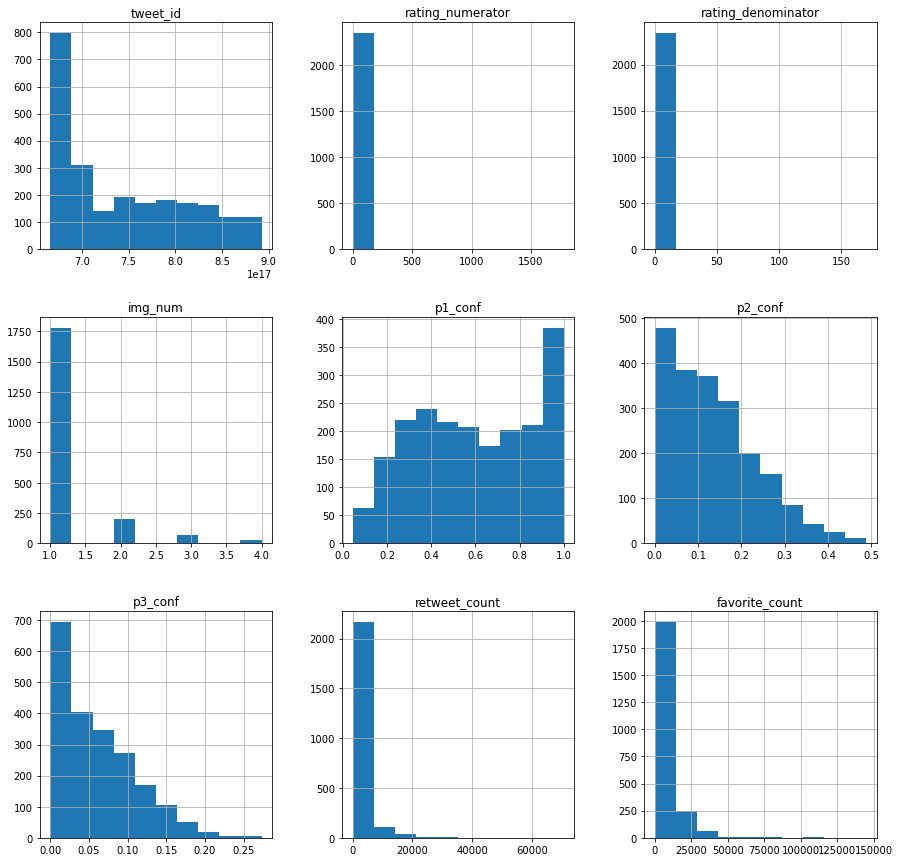

In [85]:
df.hist(figsize =(15,15), alpha =1)

<AxesSubplot:ylabel='Density'>

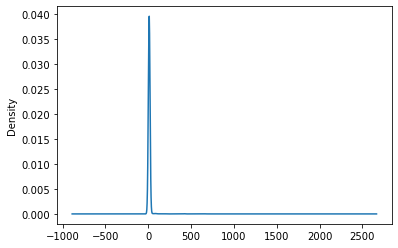

In [86]:
df.rating_numerator.plot(kind='density')

<AxesSubplot:ylabel='Density'>

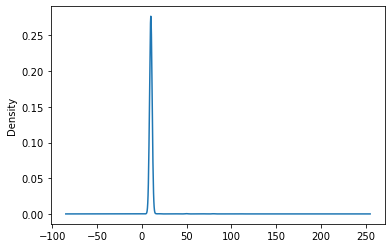

In [87]:
df.rating_denominator.plot(kind='density')

<AxesSubplot:ylabel='Density'>

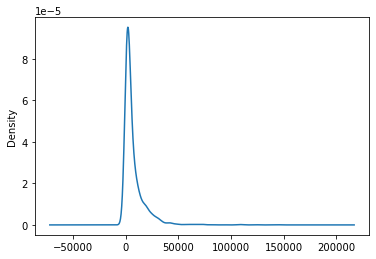

In [88]:
df.favorite_count.plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

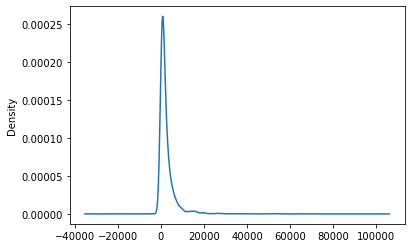

In [89]:
df.retweet_count.plot(kind = 'density')

The visuals (rating_numerator, rating_denominator, favorite_count and retweet_count) above shows a distribution Skewed towards the right i.e positively skewed meaning that the mean of all the values is less than the median therefore, they all have no normal distribution. 

**Which is the most favorite dog category according to favorite_counts**

In [90]:
df.favorite_count.describe()

count      2327.000000
mean       7047.888698
std       10952.818982
min           0.000000
25%        1224.000000
50%        3049.000000
75%        8596.500000
max      144748.000000
Name: favorite_count, dtype: float64

In [91]:
df.groupby('dogcat')['favorite_count'].mean()

dogcat
doggo            14514.200000
doggo, pupper     9583.083333
doggo, puppo     41891.000000
doggofloofer     14835.000000
floofer           9392.555556
pupper            5684.485597
puppo            15536.206897
Name: favorite_count, dtype: float64

In [92]:
df.groupby('dogcat')['favorite_count'].median()

dogcat
doggo             8954.5
doggo, pupper     7097.5
doggo, puppo     41891.0
doggofloofer     14835.0
floofer           5094.0
pupper            2628.0
puppo             8640.0
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Retweeted Counts')

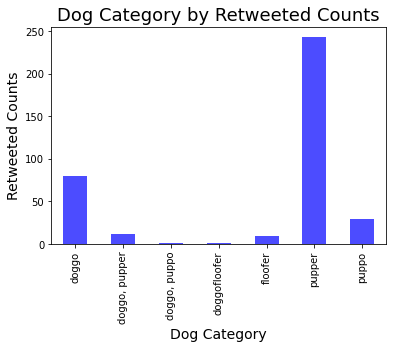

In [93]:
df.groupby('dogcat')['favorite_count'].count().plot(kind='bar', color=['blue'], alpha=.7);
plt.title('Dog Category by Retweeted Counts', fontsize=18)
plt.xlabel('Dog Category', fontsize=14)
plt.ylabel('Retweeted Counts', fontsize=14)

In [94]:
df.dogcat.value_counts()

pupper           245
doggo             83
puppo             29
doggo, pupper     12
floofer            9
doggo, puppo       1
doggofloofer       1
Name: dogcat, dtype: int64

From the mean and median analysis above, this goes to show that **DOGGO, PUPPO** dog categories has the highest favorite value than the rest dog categories with an average of about **41934** 

From the visuals above, this shows that the most popular dog in the dog category is the PUPPER dog followed by the DOGGO dog as the second popular dog, then the PUPPO dog as the third and the FLOFFER. 

Looking at both analysis, the dog category distribution is not evenly distributed given that the pupper which is the most favorite dog category has the lowest average value in mean and median values while the third most favorite dog the puppo dog category has the highest average value. The doggo,puppo which is the hybrid is ranked the highest average number of favorite . 

**Which is the most popular dog according to Retweets**

In [95]:
df.retweet_count.describe()

count     2327.000000
mean      2468.171465
std       4179.936890
min          1.000000
25%        493.500000
50%       1148.000000
75%       2858.000000
max      70643.000000
Name: retweet_count, dtype: float64

In [96]:
df.groupby('dogcat')['retweet_count'].mean()

dogcat
doggo             5760.100000
doggo, pupper     4316.166667
doggo, puppo     16127.000000
doggofloofer      2790.000000
floofer           3334.000000
pupper            2218.337449
puppo             5017.034483
Name: retweet_count, dtype: float64

In [97]:
df.groupby('dogcat')['retweet_count'].median()

dogcat
doggo             2567.5
doggo, pupper     2244.5
doggo, puppo     16127.0
doggofloofer      2790.0
floofer           2047.0
pupper            1022.0
puppo             2586.0
Name: retweet_count, dtype: float64

Text(0, 0.5, 'Retweeted Counts')

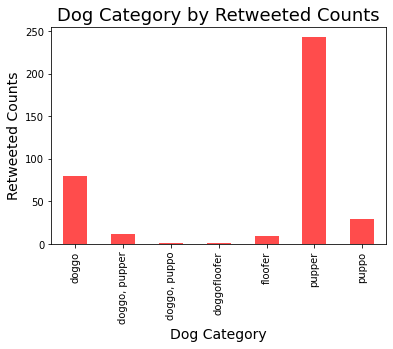

In [98]:
df.groupby('dogcat')['retweet_count'].count().plot(kind='bar', color=['red'], alpha=.7);
plt.title('Dog Category by Retweeted Counts', fontsize=18)
plt.xlabel('Dog Category', fontsize=14)
plt.ylabel('Retweeted Counts', fontsize=14)

From the mean and median analysis, this goes to show that **DOGGO, PUPPO** dog categories has more retweets number than the rest dog categories with an average of about **16148** From the visuals above, this shows that the most popular dog in the dog category is the PUPPER dog followed by the DOGGO dog as the second popular dog, then the PUPPO dog as the third and the FLOFFER. 

**What is the Relationship between the favorite_count and retweet_count**

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

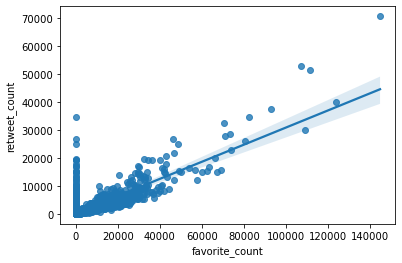

In [99]:
sns.regplot (x=df['favorite_count'],y=df['retweet_count'])

From the plot above, there is a strong positive linear relationship between the retweeted count and the favorite count showing that this two variables have a direct connection. The higher the likes on a dog post, the higher the retweets.

**Which of the source was mostly used**

In [100]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [101]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [102]:
def pie_plot(x):
    have = ['iphone','Vine', 'Twitter Web Client','TweetDeck']
    df[x].value_counts().plot.pie(labels=have,autopct='%1.0f%%',figsize=(8,8));

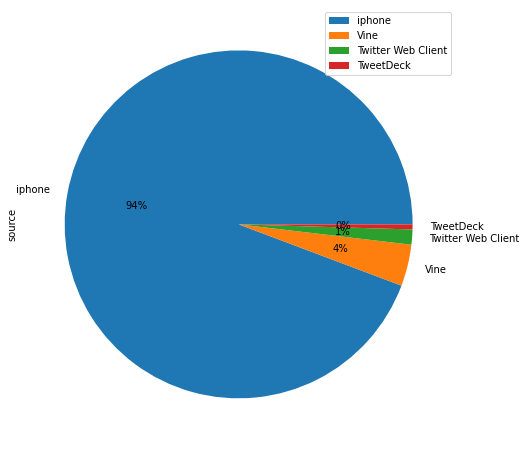

In [103]:
pie_plot('source')
plt.legend();

The above chart shows that those making use of iphones has the most used sources with 94% and a count of 2221 followed by those using the vine with 4% and a count of 91 then the twitter with 1% and a count of 33 and lastly the tweet deck with 0% and a count of 11.